In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds

In [2]:
iris = ds.load_iris()
#print(iris)
print("Loaded iris data with %d records" % len(iris.data))
#print(iris.data)
#print(iris.target)

Loaded iris data with 150 records


Load iris data into a Pandas table.  The <code>numpy.c_</code> method concatenates the input and target variables.

Code from <a href="https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset">this thread</a>.

In [3]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
#df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# Example - Select the nth column.
df.iloc[:, 0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

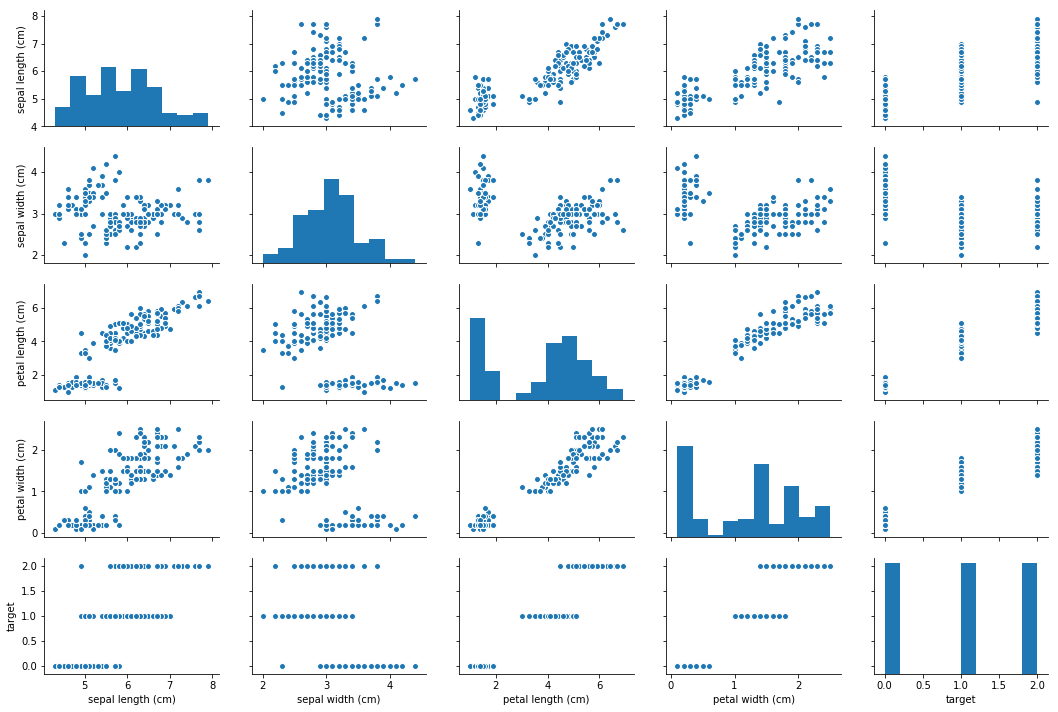

In [5]:
from seaborn import pairplot
pairplot(df, size=2.0, aspect=1.5)

<b>Linear Regression</b>

Use linear regression of one input variable to predict another.

The X data must first be <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape">reshaped</a>.

Print the coefficient values, MSE and variance score (1 is perfect).

Plot the input X and y values against the prediction line.

Coefficients: 
 [1.85750967]
Residual sum of squares: 0.74
Variance score: 0.76


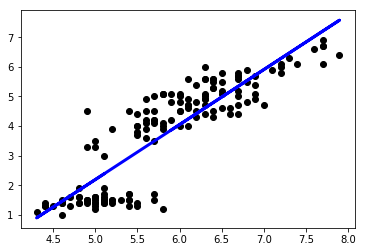

In [6]:
from sklearn import linear_model

# Use 'sepal length (cm)' as the input variable.
X = df['sepal length (cm)'].values.reshape(-1, 1)

# This is another way to get a properly shaped X array.
#X = iris.data[:, np.newaxis, 0]

# Use 'petal length (cm)' as the response variable.
# This just needs to be a list or array of the correct length.
y = df['petal length (cm)'].values

# Use a simple linear regression model.
regr = linear_model.LinearRegression()

# Fit the data.
fitted = regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, y))

# Print X vs y and prediction.
plt.scatter(X, y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()